In [2]:
onedrive = r"C:\Users\mikek\OneDrive"

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path

import shutil

sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *

%load_ext autoreload
%autoreload 2


print("Done")

Done


In [5]:
# Ensure you don't have a mesh file already loaded (netCDF caching is problematic)
try:
    mesh.close()
    del mesh
except:
    pass

# Create new grid from an existing one, read it in and create the Field object
shutil.copy(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f5-allsrc_fix_core_D.nc", 
            r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f6-also_pump.nc")


'C:\\Users\\mikek\\OneDrive\\Project\\collab\\tech\\grid\\ST40\\matteo-mod\\g3b2f6-also_pump.nc'

Mesh file C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f6-also_pump.nc closed


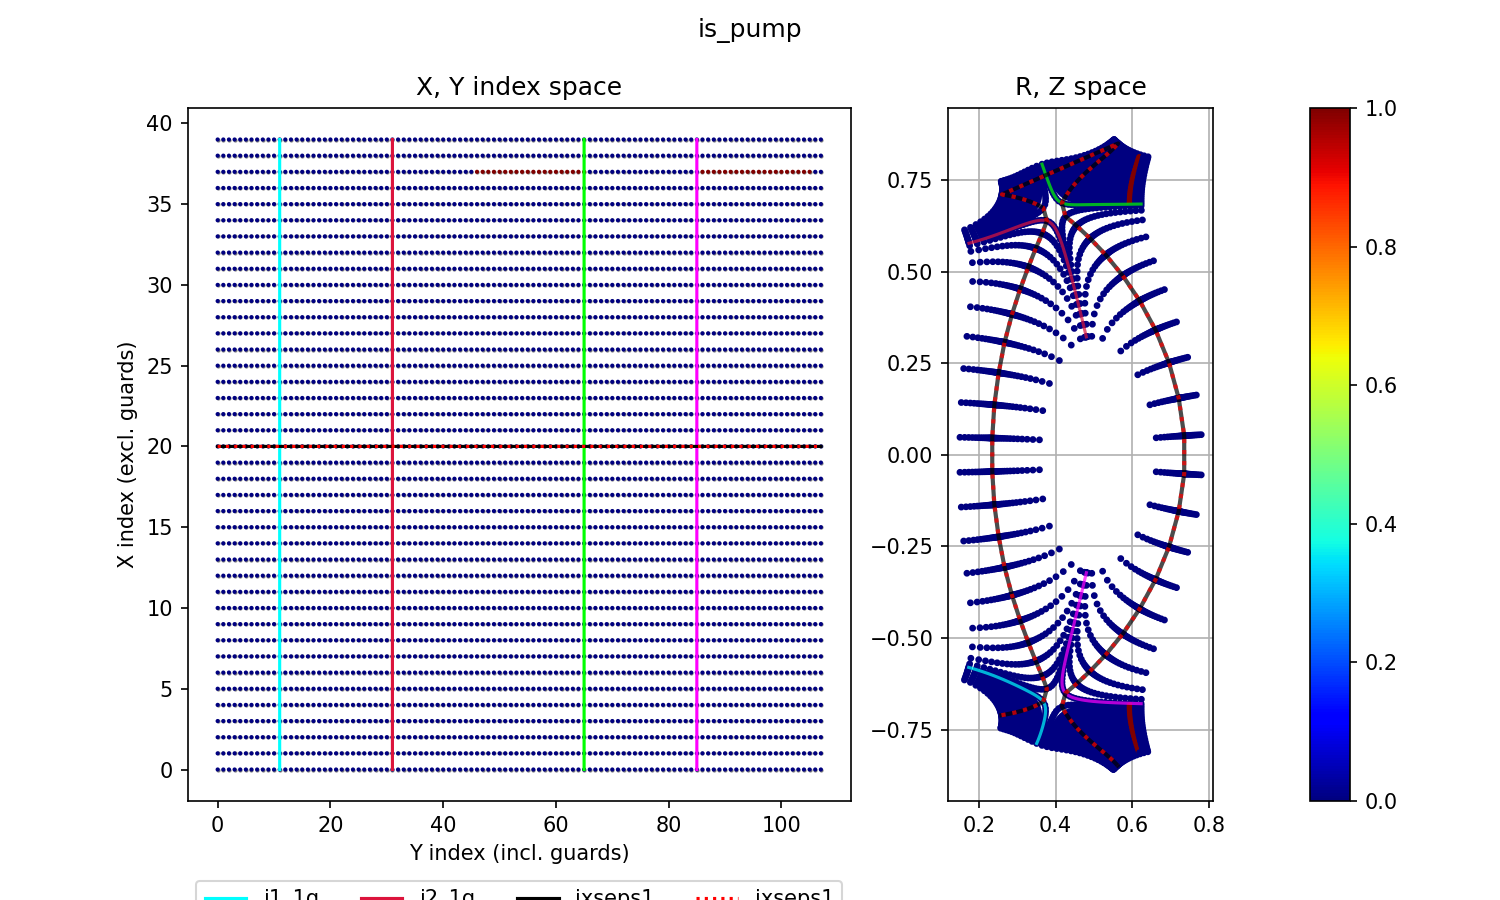

In [13]:
plt.close("all")
%matplotlib widget
mesh = Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f6-also_pump.nc")
plt.close("all")

is_pump = Field("is_pump", mesh)
# is_pump.data[:,:] = 10

# is_pump.set_value([slice(None,None), slice(None,None)], 0, make_per_volume = False)
is_pump.data[ (-3, np.r_[
    slice((-mesh.MYG-20),-mesh.MYG), 
    slice(mesh.ny_inner + mesh.MYG*3,mesh.ny_inner + mesh.MYG*3 + 20 )
             ]) ] = 1.0

is_pump.plot(dpi = 150)

mesh.mesh.write("is_pump", is_pump.data, info = True)
mesh.close()

# mesh.write_field(is_pump, dtype = "Field2D")
# mesh.write_field(D_i, dtype = "Field2D")
# mesh.write_field(Chi_e, dtype = "Field2D")
# mesh.write_field(Chi_i, dtype = "Field2D")

# CHeck and close again

Mesh file C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f6-also_pump.nc closed


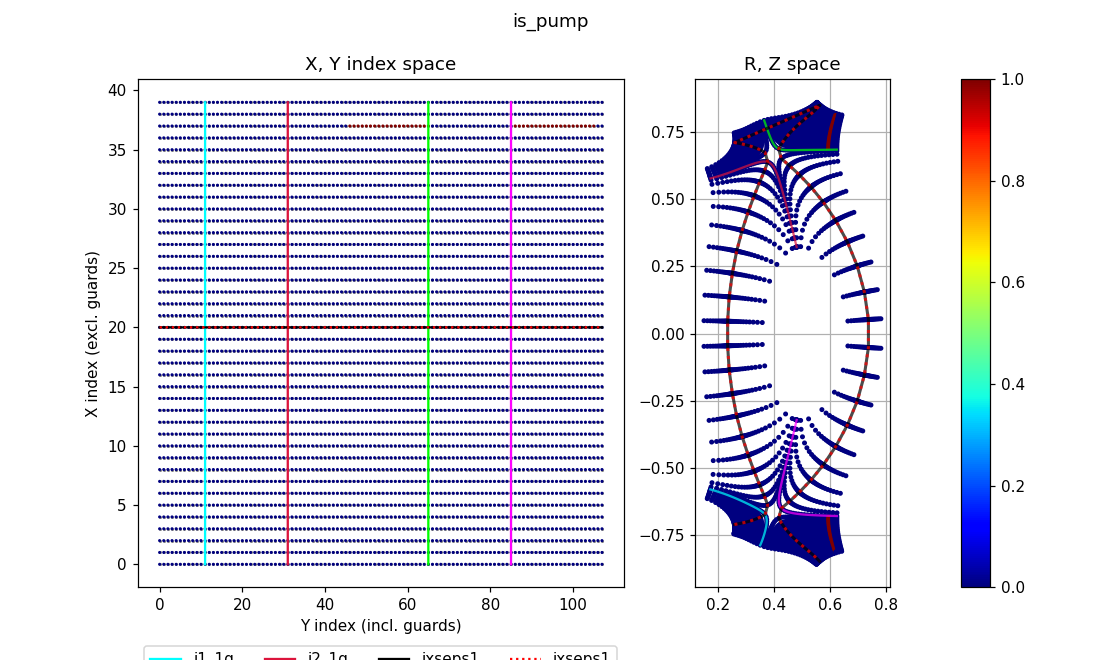

In [14]:
mesh = Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2f6-also_pump.nc")
mesh.plot_field("is_pump")
mesh.close()